## $$ \textrm{Basics} $$

## 1. 코랩에서 구글드라이브 연동 및 데이터 폴더 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/ML_202402/Data/')

Mounted at /content/drive


## 2. 모형 생성

In [ ]:
# x는 정규분포에서 생성, y의 평균은 x + 50이면서 정규분포를 따름
# 상관계수의 확인
#---------------------------------------------------------------
import numpy as np
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale=1, size=50)
np.corrcoef(x, y)

array([[1.        , 0.77935101],
       [0.77935101, 1.        ]])

In [ ]:
# 정규분포를 따르는 난수의 생성법
# 여기에서 rng를 초기 시드를 지정하는 법
# 시드의 값이 같으면 난수의 값도 같음에 유의
#-------------------------------------------
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=10))

rng2 = np.random.default_rng(1330)
print(rng2.normal(scale=5, size=10))

rng = np.random.default_rng(3)
y = rng.standard_normal(10)
print(y)
np.mean(y), y.mean()

[  4.09482632  -1.07485605 -10.15364596   1.13406146  -4.14030566
  -4.74859823   0.48740125   5.65355173  -2.51588502  -8.07334198]
[ 1.83969393  1.26060195  1.8241157   1.7828998  -1.61536633 -1.84860455
  7.97028422 -8.87272153 -2.24243852  9.15779778]
[ 2.04091912 -2.55566503  0.41809885 -0.56776961 -0.45264929 -0.21559716
 -2.01998613 -0.23193238 -0.86521308  3.32299952  0.22578661 -0.35263079
 -0.28128742 -0.66804635 -1.05515055 -0.39080098  0.48194539 -0.23855361
  0.9577587  -0.19980213  0.02425957  1.54582085  0.54510552 -0.50522874
 -0.18283897  0.54052513  1.93508803 -0.26962033 -0.24355868  1.0023136
 -0.88645994 -0.29172023  0.88253897  0.58035002  0.0915167   0.67010435
 -2.82816231  1.02130682 -0.95964476 -1.66861984  0.27644576  0.70054489
 -0.44476746 -1.07640584  0.02612483 -0.05274731  1.40559817  0.74740799
  0.19381565  1.11163321 -0.20552305 -0.92589957  0.58405831  0.58253842
 -0.21482891 -0.78280858  0.22915391 -2.49389428  0.69012477  0.49136826
 -1.63885714  0

(-0.06177067418065971, -0.06177067418065971)

In [ ]:
# y의 분산을 확인 (표본의 크기가 커지면 1에 가까워 져야 함)
# ---------------------------------------------------------
print(np.var(y)), y.var()
np.mean((y - y.mean())**2)

1.1370356256413636


1.1370356256413636

## 3. 그래프

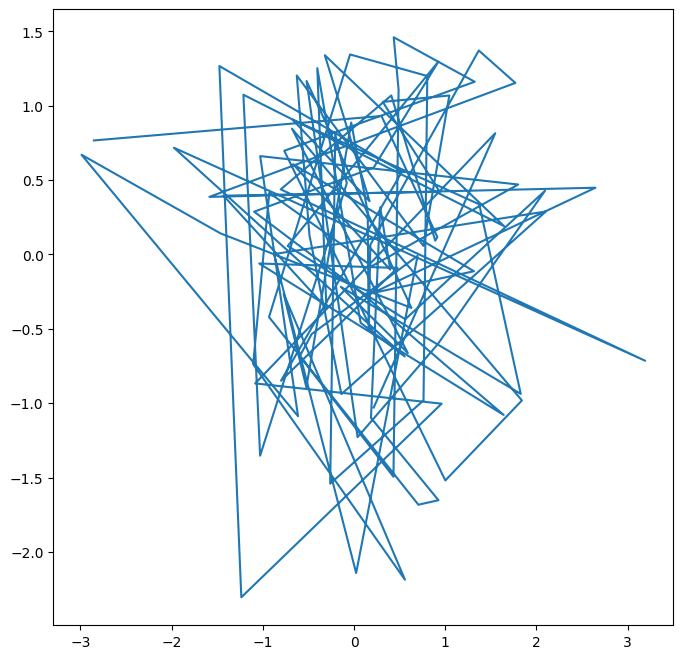

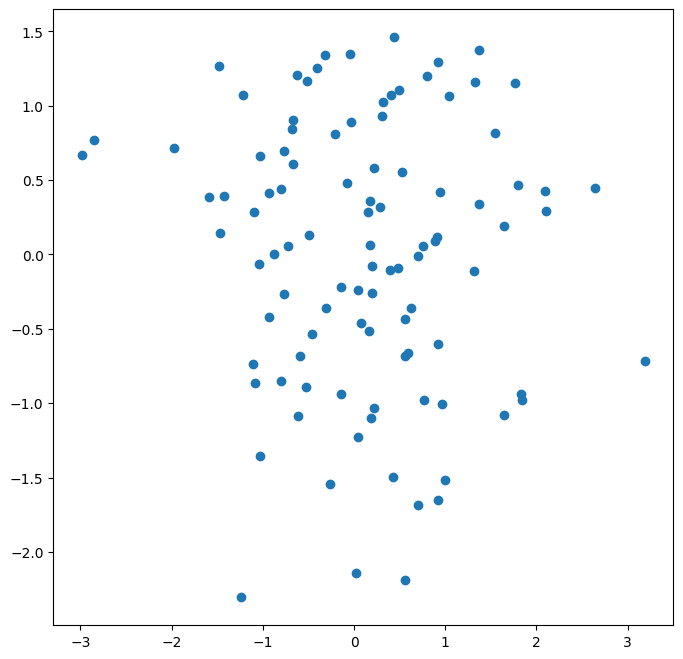

In [ ]:
from matplotlib.pyplot import subplots

# 그래프 구문: fig, ax
# --------------------
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);

# 그래프 구문: 선에서 산점도 형태로
# ---------------------------------
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

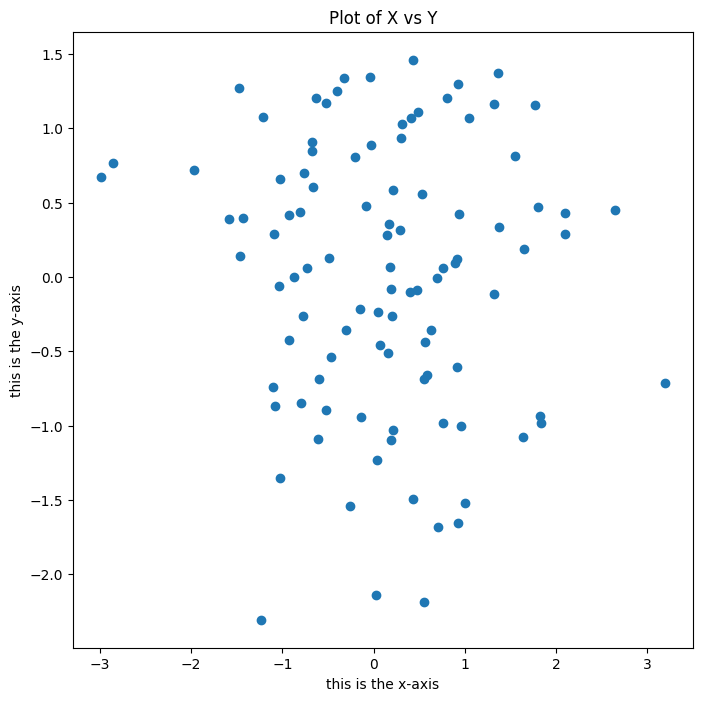

In [ ]:
# 산점도에 scatter 구문을 이용해서 처리
# -------------------------------------
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");

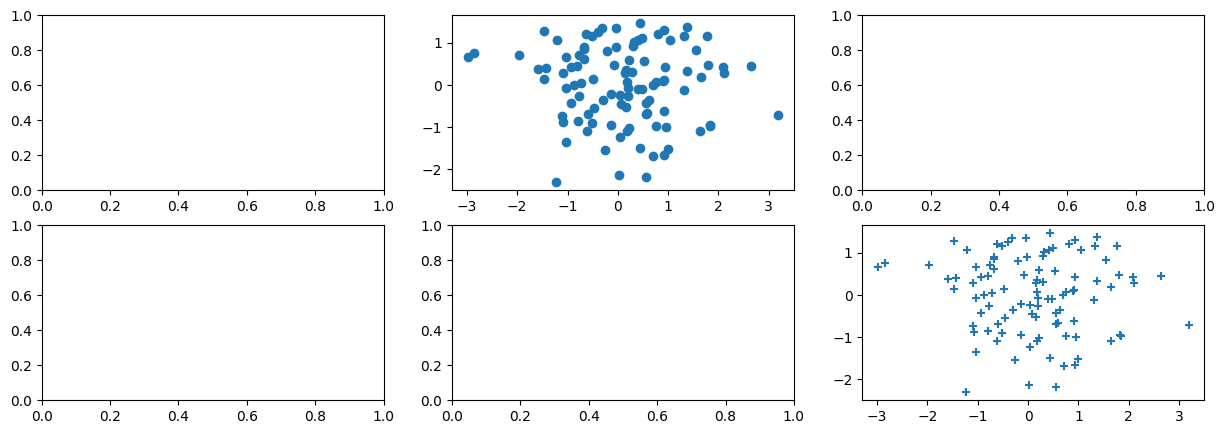

In [ ]:
# 2*3 행렬 플랏: axes를 이용하여 각 그래프를 처리
# -----------------------------------------------
fig, axes = subplots(nrows=2, ncols=3, figsize=(15, 5))
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

# 바깥으로 그림을 저장함
# ---------------------
fig.savefig("Figure.png", dpi=400)

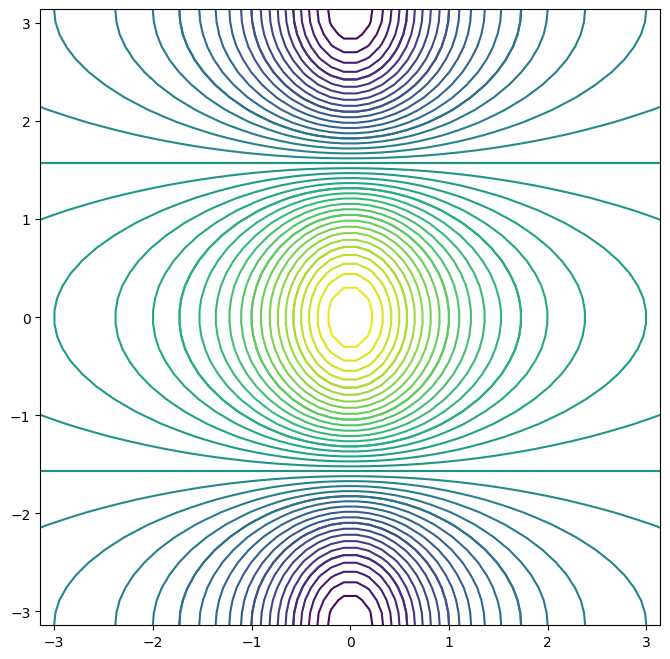

In [ ]:
# CONTOUR: 3차원의 등고선 그래프
# ------------------------------
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) # z = f(x,y)
ax.contour(x, y, f);
ax.contour(x, y, f, levels=45);


## 4. 데이터(프레임) 조작

In [ ]:
A = np.array(np.arange(16)).reshape((4, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
# 1,3의 행에서 0,3의 열 반환
# 1,3의 행에서 0,2,3의 열 반환
# ---------------------------
print(A[[1,3]][:,[0,2]])
idx = np.ix_([1,3],[0,2,3])
A[idx]

[[ 4  6]
 [12 14]]


array([[ 4,  6,  7],
       [12, 14, 15]])

In [ ]:
# 데이터 로딩
#------------
import pandas as pd
Auto = pd.read_csv('Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# 구별되는 값 확인 및 결측치 제거
# -------------------------------
print(np.unique(Auto['horsepower']))

Auto_new = Auto.dropna()
print(Auto.shape)
print(Auto_new.shape)

Auto_re = Auto.set_index('name')
# 행 구분자에 변수명 추가
Auto_re

['100' '102' '103' '105' '107' '108' '110' '112' '113' '115' '116' '120'
 '122' '125' '129' '130' '132' '133' '135' '137' '138' '139' '140' '142'
 '145' '148' '149' '150' '152' '153' '155' '158' '160' '165' '167' '170'
 '175' '180' '190' '193' '198' '200' '208' '210' '215' '220' '225' '230'
 '46' '48' '49' '52' '53' '54' '58' '60' '61' '62' '63' '64' '65' '66'
 '67' '68' '69' '70' '71' '72' '74' '75' '76' '77' '78' '79' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '?']
(397, 9)
(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [ ]:
# 데이터 프레임에서 원하는 값을 찾는 법
# ------------------------------------

rows = ['amc rebel sst', 'ford torino']
print(Auto_re.loc[rows])
print(Auto_re.iloc[[1,2,3,4],[0,2,3]])

# 연도가 80을 넘는 것 중 weight과 origin
idx_80 = Auto_re['year'] > 80
print(Auto_re.loc[idx_80, ['weight', 'origin']])

#연도가 80을 넘고 mpg가 30이 넘은 것 중 weight과 origin
print(Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
['weight', 'origin'] ])

                mpg  cylinders  displacement horsepower  weight  acceleration  \
name                                                                            
amc rebel sst  16.0          8         304.0        150    3433          12.0   
ford torino    17.0          8         302.0        140    3449          10.5   

               year  origin  
name                         
amc rebel sst    70       1  
ford torino      70       1  
                     mpg  displacement horsepower
name                                             
buick skylark 320   15.0         350.0        165
plymouth satellite  18.0         318.0        150
amc rebel sst       16.0         304.0        150
ford torino         17.0         302.0        140
                                   weight  origin
name                                             
plymouth reliant                     2490       1
buick skylark                        2635       1
dodge aries wagon (sw)               2620       1
chevr

## 5. 데이터 처리

In [54]:
# 가중평균 및 결측치 생성
# -----------------------

# zip 구문을 이용한 가중평균 계산
total = 0
for value, weight in zip([2,3,19],[0.2,0.3,0.5]):
  total += weight * value
  print('Weighted average is: {0}'.format(total))

# M에서 np.nan을 선택, 임의의 결측치 생성
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8,0.2], size=A.shape)
A += M
D = pd.DataFrame(A, columns=['food','bar', 'pickle', 'snack', 'popcorn'])
print(D[:3])

for col in D.columns:
  template = 'Column "{0}" has {1:.2%} missing values'
  print(template.format(col, np.isnan(D[col]).mean()))
  #print format 0: col, 1: np.isnan(D[col]).mean()
  #col-colname

Weighted average is: 0.4
Weighted average is: 1.2999999999999998
Weighted average is: 10.8
       food       bar    pickle     snack   popcorn
0  0.345584  0.821618  0.330437 -1.303157       NaN
1       NaN -0.536953  0.581118  0.364572  0.294132
2       NaN  0.546713       NaN -0.162910 -0.482119
food
Column "food" has 16.54% missing values
bar
Column "bar" has 25.98% missing values
pickle
Column "pickle" has 29.13% missing values
snack
Column "snack" has 21.26% missing values
popcorn
Column "popcorn" has 22.83% missing values


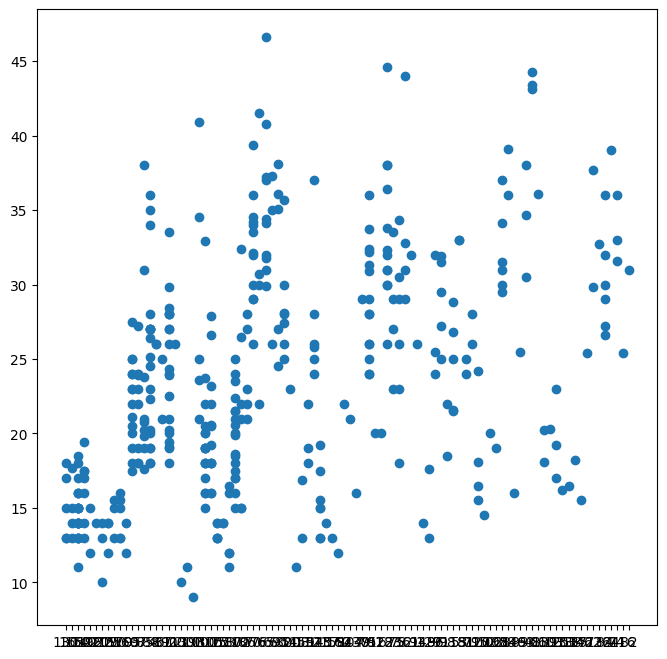

In [56]:
# 상호 관계를 알기 위한 산점도
# ----------------------------
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');